In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
# SNS styles
sns.set(style="darkgrid")
sns.set_palette("cubehelix")
import random
import simpy
import statistics
from scipy import stats
from dataclasses import dataclass
from typing import List, Dict, Callable, Union, Any, Tuple
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Read .csv
log = pd.read_csv('data/Sim data/sim_log_unlcap.csv', index_col=[0])
log.tail()

,Time,Machine,State,Set speed,Actual speed,Count,Tailback,Lack,Simulation
43299995,480.0,Labeler_2,128,580.0,580.0,219711.0,0,0,10000.0
43299996,480.0,GPI,128,1200.0,666.0,261668.0,0,1,10000.0
43299997,480.0,SN64,128,510.0,510.0,261334.0,0,0,10000.0
43299998,480.0,Palletizer_1,128,1200.0,510.0,126935.0,0,1,10000.0
43299999,480.0,Palletizer_2,128,0.0,0.0,134399.0,0,0,10000.0


In [4]:
log.head()

,Time,Machine,State,Set speed,Actual speed,Count,Tailback,Lack,Simulation
0,0.0,All,Simulation start,0.0,0.0,0.0,0,0,1.0
1,0.0,Depalletizer,128,6000.0,6000.0,6000.0,0,0,1.0
2,0.0,Filler,128,1291.0,1291.0,1291.0,0,0,1.0
3,0.0,Pasteurizer,128,720.0,720.0,720.0,0,0,1.0
4,0.0,Labeler_1,128,333.0,333.0,333.0,0,0,1.0


In [44]:
# Create dataframe and csv per machine
df_depal = log[log['Machine'] == 'Depalletizer']
df_depal.to_csv('data/Sim data/depal_log.csv')
df_filler = log[log['Machine'] == 'Filler']
df_filler.to_csv('data/Sim data/filler_log.csv')
df_past = log[log['Machine'] == 'Pasteurizer']
df_past.to_csv('data/Sim data/past_log.csv')
df_lab_1 = log[log['Machine'] == 'Labeler_1']
df_lab_1.to_csv('data/Sim data/lab1_log.csv')
df_lab_2 = log[log['Machine'] == 'Labeler_2']
df_lab_2.to_csv('data/Sim data/lab2_log.csv')
df_gpi = log[log['Machine'] == 'GPI']
df_gpi.to_csv('data/Sim data/GPI_log.csv')
df_SN64 = log[log['Machine'] == 'SN64']
df_SN64.to_csv('data/Sim data/SN64_log.csv')
df_pal1 = log[log['Machine'] == 'Palletizer_1']
df_pal1.to_csv('data/Sim data/pal1_log.csv')
df_pal2 = log[log['Machine'] == 'Palletizer_2']
df_pal2.to_csv('data/Sim data/pal2_log.csv')

In [5]:
# For ease of use: read machine .csv's
df_depal = pd.read_csv('data/Sim data/depal_log.csv', index_col=[0])
df_filler = pd.read_csv('data/Sim data/filler_log.csv', index_col=[0])
df_past = pd.read_csv('data/Sim data/past_log.csv', index_col=[0])
df_lab_1 = pd.read_csv('data/Sim data/lab1_log.csv', index_col=[0])
df_lab_2 = pd.read_csv('data/Sim data/lab2_log.csv', index_col=[0])
df_gpi = pd.read_csv('data/Sim data/GPI_log.csv', index_col=[0])
df_SN64 = pd.read_csv('data/Sim data/SN64_log.csv', index_col=[0])
df_pal1 = pd.read_csv('data/Sim data/pal1_log.csv', index_col=[0])
df_pal2 = pd.read_csv('data/Sim data/pal2_log.csv', index_col=[0])

# Analysis of the simulations

## Analysis of the current situation

### OPI

In [6]:
# Calculate final throughput of the two palletizers
final_throughput = log['Count'][(log['Machine'] == 'Palletizer_1') & (log['Time'] == 480)].reset_index(drop = True) + log['Count'][(log['Machine'] == 'Palletizer_2') & (log['Time'] == 480)].reset_index(drop = True)
# Calculate OPI for the palletizers
nominal = 1200*480
OPI = final_throughput/nominal

The average OPI is 0.413 
The maximum OPI is 0.52 
The minimum OPI is 0.048


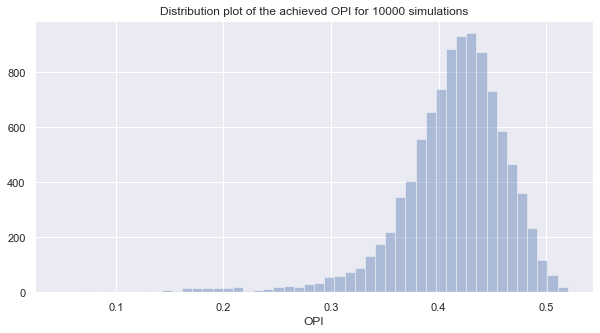

In [59]:
# Plot the OPI for all simulations
sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(OPI, kde = False, axlabel = 'OPI').set(title='Distribution plot of the achieved OPI for 10000 simulations')
print(f'The average OPI is {round(OPI.mean(),3)} \nThe maximum OPI is {max(round(OPI, 3))} \nThe minimum OPI is {round(min(OPI),3)}')

### Lack and tailback

In [10]:
df_lack[['Simulation', 'Depalletizer']] = log[['Simulation', 'Lack']][(log['Machine'] == 'Depalletizer')].reset_index(drop = True)
df_lp['Filler'] = log['Lack'][(log['Machine'] == 'Filler')].reset_index(drop = True)
df_lp['Pasteurizer'] = log['Lack'][(log['Machine'] == 'Pasteurizer')].reset_index(drop = True)
df_lp['Labeler'] = log['Lack'][(log['Machine'] == 'Labeler_1')].reset_index(drop = True)
df_lp['GPI'] = log['Lack'][(log['Machine'] == 'GPI')].reset_index(drop = True)
df_lp['SN64'] = log['Lack'][(log['Machine'] == 'SN64')].reset_index(drop = True)
df_lp['Palletizer'] = log['Lack'][(log['Machine'] == 'Palletizer_1')].reset_index(drop = True)

NameError: name 'df_lp' is not defined

In [25]:
lack_filler = []
lack_pasteurizer = []
lack_labeler = []
lack_GPI = []
lack_SN64 = []
lack_pal = []
for i in range(1000):    
    lack_filler.append(len(df_filler[['Time']][(df_filler['Lack'] == 1) & (df_filler['Simulation'] == i)]))
    lack_pasteurizer.append(len(df_past[['Time']][(df_past['Lack'] == 1) & (df_past['Simulation'] == i)]))
    lack_labeler.append(len(df_lab_1[['Time']][(df_lab_1['Lack'] == 1) & (df_lab_1['Simulation'] == i)]))
    lack_GPI.append(len(df_gpi[['Time']][(df_gpi['Lack'] == 1) & (df_gpi['Simulation'] == i)]))
    lack_SN64.append(len(df_SN64[['Time']][(df_SN64['Lack'] == 1) & (df_SN64['Simulation'] == i)]))
    lack_pal.append(len(df_pal1[['Time']][(df_pal1['Lack'] == 1) & (df_pal1['Simulation'] == i)]))

<function matplotlib.pyplot.show(close=None, block=None)>

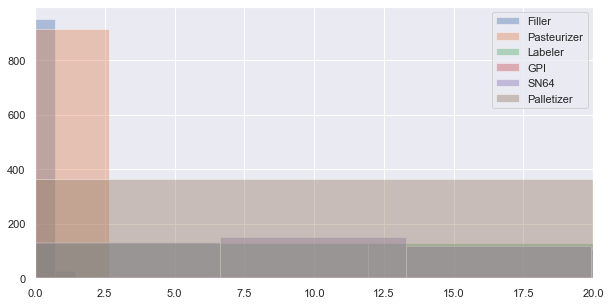

In [52]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(lack_filler, kde = False, label = 'Filler')
sns.distplot(lack_pasteurizer, kde = False, label = 'Pasteurizer')
sns.distplot(lack_labeler, kde = False, label = 'Labeler')
sns.distplot(lack_GPI, kde = False, label = 'GPI')
sns.distplot(lack_SN64, kde = False, label = 'SN64')
sns.distplot(lack_pal, kde = False, label = 'Palletizer')
plt.legend(labels = ['Filler', 'Pasteurizer', 'Labeler', 'GPI', 'SN64', 'Palletizer'])
plt.xlim(0, 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

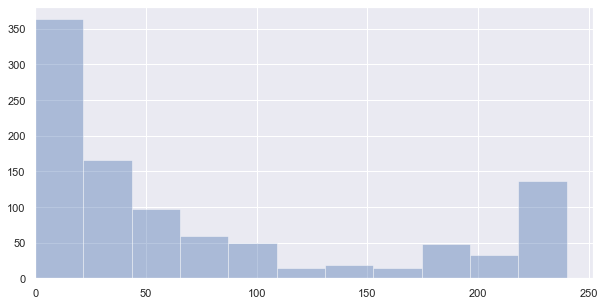

In [58]:
sns.distplot(lack_pal, kde = False, label = 'Palletizer')
plt.xlim(0,)
plt.show